**<font color='orange'>Завдання**</font>
### <font color='#11aa0055'>Реалізуйте функцію для зчитування зображення з файлу та його відображення за допомогою бібліотеки **OpenCV**:</font>
* <font size='4' color='fuchsia'>Реалізуйте фільтр **Собеля** для зображення та відобразіть його результат.</font>
*  <font size='4' color='fuchsia'>Реалізуйте **медіанний** фільтр та відобразіть його результат.</font>
* <font size='4' color='fuchsia'>Порівняйте результати цих фільтрів та проілюструйте їх відмінності на зображенні.</font>


In [16]:
# Required libraries.
import cv2
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

import warnings
warnings.simplefilter('ignore')

## <font color='olive'>Uploading image</font>

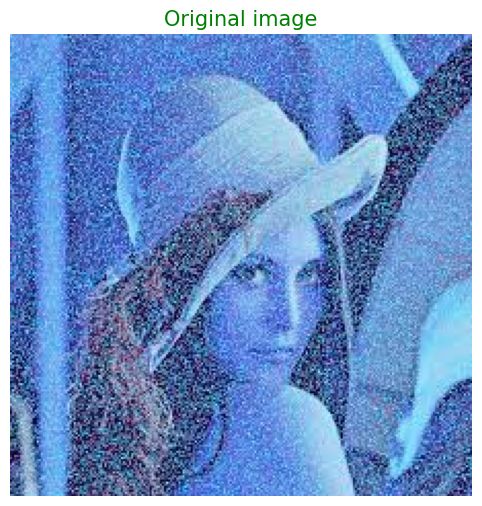

In [17]:
# Reading a color image.
origin_img = cv2.imread('girl.jpg')
plt.figure(figsize=(10, 6))
plt.title('Original image', fontsize=15, color='g')
plt.axis('off')
plt.imshow(origin_img)
plt.show()

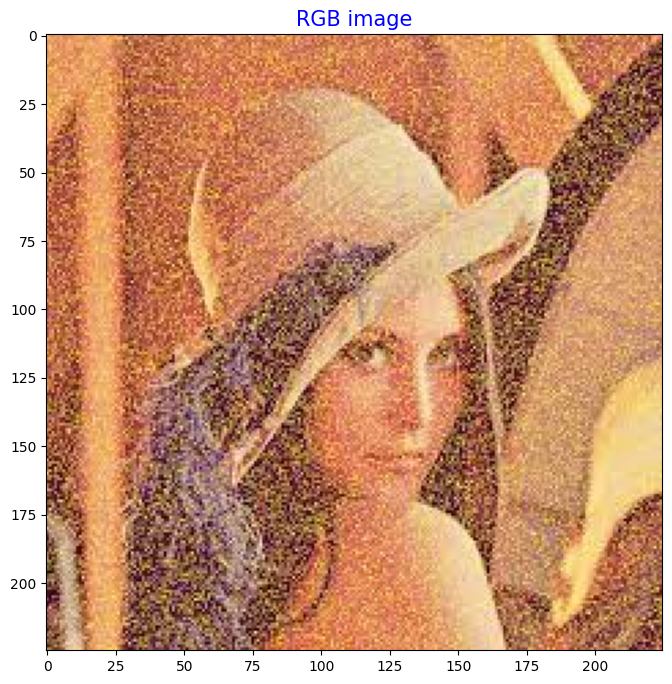

In [18]:
# Converting the origin image to RGB.
RGB_img = cv2.cvtColor(origin_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 8))
plt.title('RGB image', fontsize=15, color='b')
plt.imshow(RGB_img)
plt.show()

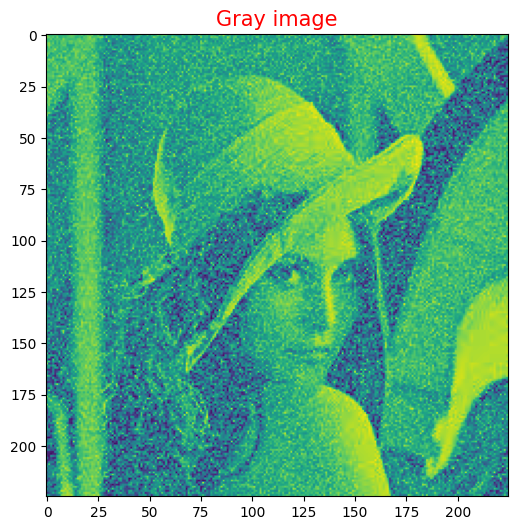

In [28]:
# Converting the RGB image to gray.
gray_img = cv2.cvtColor(origin_img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(10, 6))
plt.title('Gray image', fontsize=15, color='r')
plt.imshow(gray_img)
plt.show()

# <font color='orange'>Implementing The Sobel Filter</font>
## <font color='blue'>1st option</font>

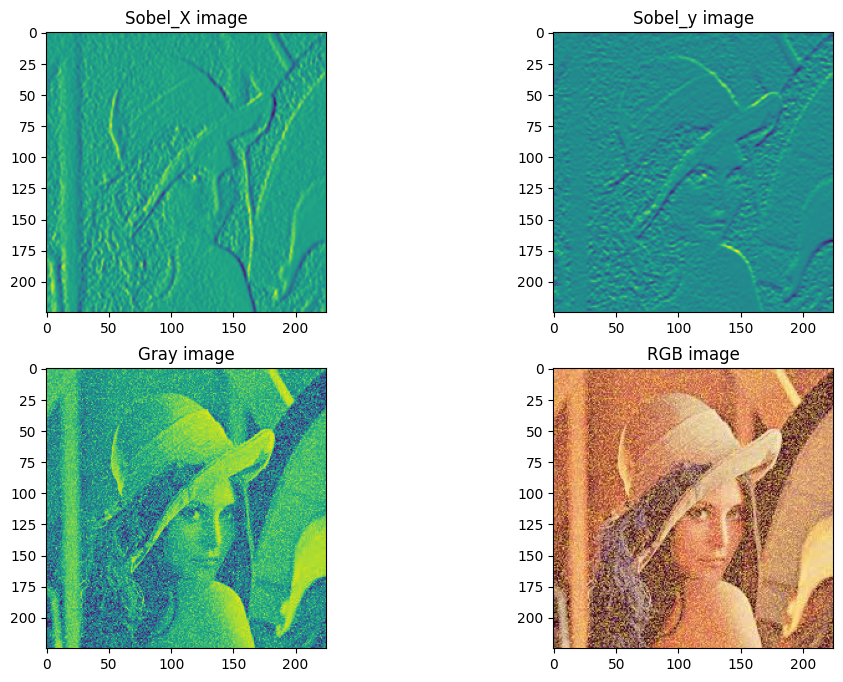

In [29]:
# Creating a figure for a subplot.
fig = plt.figure(figsize=(12, 8))

# Subplot and Title for a Sobel_X.
ax1 = fig.add_subplot(221)  # top left side.
ax1.title.set_text('Sobel_X image')

# Subplot and Title for a Sobel_y.
ax2 = fig.add_subplot(222)  # top right side.
ax2.title.set_text('Sobel_y image')

# Creating the Sobel filter for X and y.
Sobel_X = cv2.Sobel(gray_img, cv2.CV_64F, 1, 0, ksize=5)
Sobel_y = cv2.Sobel(gray_img, cv2.CV_64F, 0, 1, ksize=5)

# Subplot and Title for the Gray image.
ax3 = fig.add_subplot(223)  # bottom left side.
ax3.title.set_text('Gray image')

# Subplot and Title for the RGB image.
ax4 = fig.add_subplot(224)  # bottom right side.
ax4.title.set_text('RGB image')

# Showing the subplot
ax1.imshow(Sobel_X)
ax2.imshow(Sobel_y)
ax3.imshow(gray_img)
ax4.imshow(RGB_img)

plt.show()

# <font color='orange'>Implementing The Sobel Filter</font>
## <font color='blue'>2d option</font>

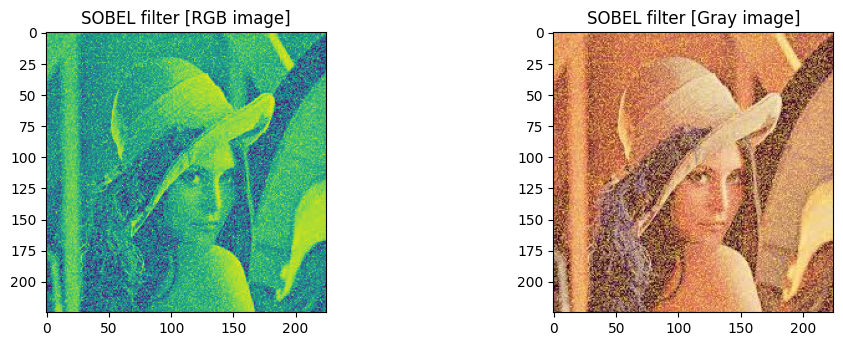

In [30]:
# Making matrix for the Sobel filter.
kernel_X = np.array([[-1,0,1], [-2,0,2], [-1,0,1]])
kernel_y = np.array([[-1,-2,-1], [0,0,0], [1,2,1]])

# Splitting into X, y edges for RGB filter model
RGB_edges_X = cv2.filter2D(RGB_img, -1, kernel_X)
RGB_edges_y = cv2.filter2D(RGB_img, -1, kernel_y)

# Splitting into X, y edges for Gray filter model
gray_edges_X = cv2.filter2D(gray_img, -1, kernel_X)
gray_edges_y = cv2.filter2D(gray_img, -1, kernel_y)

# Combining RGB edges.
edges_RGB = RGB_edges_X + RGB_edges_y
# Combining Gray edges.
edges_gray = gray_edges_X + gray_edges_y

# Creating a figure for a subplot.
fig = plt.figure(figsize=(12, 8))

# Subplot and Title for a RGB image.
ax1 = fig.add_subplot(221)  # top left side.
ax1.title.set_text('SOBEL filter [RGB image]')

# Subplot and Title for a Gray image.
ax2 = fig.add_subplot(222)  # top right side.
ax2.title.set_text('SOBEL filter [Gray image]')

# Showing the subplot.
ax1.imshow(gray_img)
ax2.imshow(RGB_img)
plt.show()

# <font color='orange'>Implementing Median Filter</font>

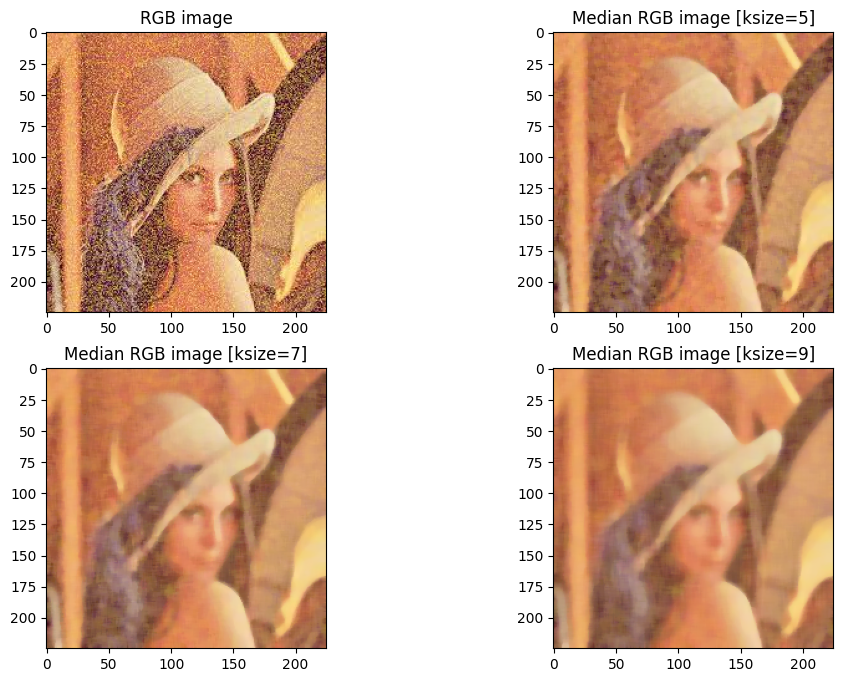

In [31]:
# Converting to the medianBlur.
median_img_5 = cv2.medianBlur(RGB_img, ksize=5)
median_img_7 = cv2.medianBlur(RGB_img, ksize=7)
median_img_9 = cv2.medianBlur(RGB_img, ksize=9)

# Creating a figure for a subplot.
fig = plt.figure(figsize=(12, 8))

# Subplot and Title for the RGB image.
ax1 = fig.add_subplot(221)  # top left side.
ax1.title.set_text('RGB image')

# Subplot and Title for the Median RGB image with ksize=5.
ax2 = fig.add_subplot(222)  # top right side.
ax2.title.set_text('Median RGB image [ksize=5]')

# Subplot and Title for the Median RGB image with ksize=7.
ax3 = fig.add_subplot(223)  # bottom left side.
ax3.title.set_text('Median RGB image [ksize=7]')

# Subplot and Title for the Median RGB image with ksize=9.
ax4 = fig.add_subplot(224)  # bottom right side.
ax4.title.set_text('Median RGB image [ksize=9]')

# Display the subplot.
ax1.imshow(RGB_img)
ax2.imshow(median_img_5)
ax3.imshow(median_img_7)
ax4.imshow(median_img_9)
plt.show()

# <font color='darkblue'>Comparison of the Median and the Sobel filters</font>

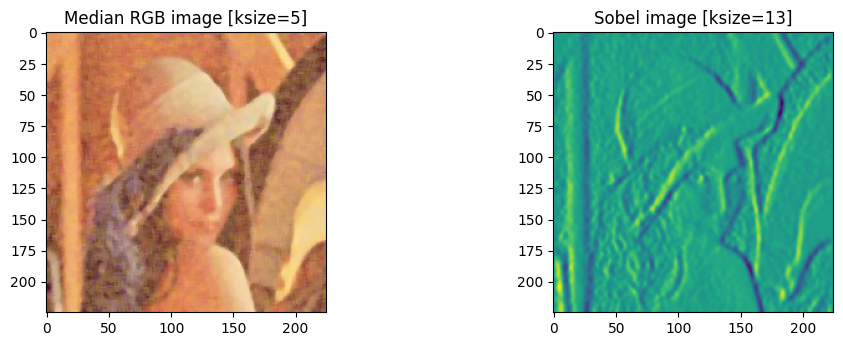

In [32]:
# Converting to the medianBlur.
median_img_5 = cv2.medianBlur(RGB_img, ksize=5)

# Creating the Sobel filter for X and y.
Sobel_img = cv2.Sobel(gray_img, cv2.CV_64F, 1, 0, ksize=13)

# Creating a figure for a subplot.
fig = plt.figure(figsize=(12, 8))

# Subplot and Title for the RGB image.
ax1 = fig.add_subplot(221)  # top left side.
ax1.title.set_text('Median RGB image [ksize=5]')

# Subplot and Title for the Sobel image.
ax2 = fig.add_subplot(222)  # top right side.
ax2.title.set_text('Sobel image [ksize=13]')

# Display the subplot.
ax1.imshow(median_img_5)
ax2.imshow(Sobel_img)

plt.show()

## <font color='darkblue'>Після порівняння цих двох фільтрів можу зробити такий висновок:</font>

*   <font color='forestgreen'>**Median** фільтр використовується для зменшення плямистих, "соляних" та "перецевих" шумів.</font>
*   <font color='forestgreen'>**Sobel** фільтр – для відображення контурів зображення.</font>

<font color='forestgreen'>Якість та чіткість можна регулювати параметром ksize.</font>

